In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, Math
warnings.filterwarnings('ignore')

# Задание 1. Вещественные функции

\begin{equation}
a, b > 0
\end{equation}

\begin{equation}
t_2 > t_1 > t_0 > 0
\end{equation}

\begin{equation}
f: \mathbb{R} \to \mathbb{R}
\end{equation}

\begin{equation}
T = t_2 - t_0
\end{equation}

In [2]:
a, b = -2, 4
t0, t1, t2 = 1, 3, 5
T = t2 - t0

## Частичные суммы Фурье

\begin{equation}
F_{N}(t) = \frac{a_0}{2} + \sum_{n=1}^{N}(a_{n}cos(\omega_{n}t) + b_{n}sin(\omega_{n}t)),
\end{equation}

\begin{equation}
G_{n}(t) = \sum_{n=-N}^{N}c_{n}e^{i\omega_{n}t},
\end{equation}

где
\begin{equation}
\omega_n = \frac{2\pi n}{T},
\end{equation}

\begin{equation}
a_0 = \frac{2}{T} \int_{t_0}^{t_2} f(t)dt,
\end{equation}

\begin{equation}
a_n = \frac{2}{T} \int_{t_0}^{t_2} f(t)*cos(\omega_nt)dt,
\end{equation}

\begin{equation}
b_n = \frac{2}{T} \int_{t_0}^{t_2} f(t)*sin(\omega_nt)dt,
\end{equation}

\begin{equation}
c_n = \frac{1}{T} \int_{t_0}^{t_2} f(t)*e^{-i\omega_nt}dt
\end{equation}

In [3]:
def Fn(func, t, N):
    part_sum = 2 / T * np.trapz(func(t), t) / 2
    for n in range(1, N + 1):
        w_n = 2 * np.pi * n / T
        a_n =  2 / T * np.trapz(func(t) * np.cos(w_n * t), t)
        b_n =  2 / T * np.trapz(func(t) * np.sin(w_n * t), t)
        part_sum += (a_n * np.cos(w_n * t) + b_n * np.sin(w_n * t))
    return part_sum

In [4]:
def Gn(func, t, N):
    part_sum = 0
    for n in range(-N, N + 1):
        w_n = 2 * np.pi * n / T
        c_n =  1 / T * np.trapz(func(t) * np.exp(-1j * w_n * t), t)
        part_sum += c_n * np.exp(1j * w_n * t)
    return part_sum

## Квадратная волна

\begin{equation}
    f(t) =
    \begin{cases}
        a, t \in [t_0, t_1), \\
        b, t \in [t_1, t_2)
    \end{cases}
\end{equation}

In [5]:
def square(t):
    return np.piecewise(t, [t < t1, t >= t1],[a, b])

### График исходной функции

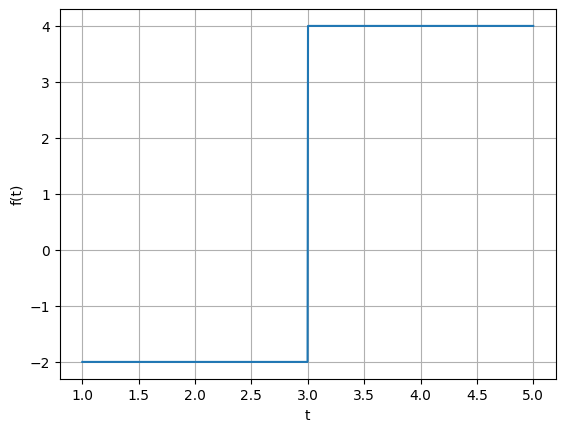

In [6]:
t = np.linspace(t0, t2, 1000)
plt.plot(t, square(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)

### Коэффициенты фурье

In [7]:
for n in range(4):
    w_n = 2 * np.pi * n / T
    a_n =  2 / T * np.trapz(square(t) * np.cos(w_n * t), t)
    b_n =  2 / T * np.trapz(square(t) * np.sin(w_n * t), t)
    c_n =  1 / T * np.trapz(square(t) * np.exp(-1j * w_n * t), t)
    display(Math(f'a_{n} = {np.round(a_n, 4)}, b_{n} = {np.round(b_n, 4)}, c_{n} = {np.round(c_n, 4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Графики частичных сумм

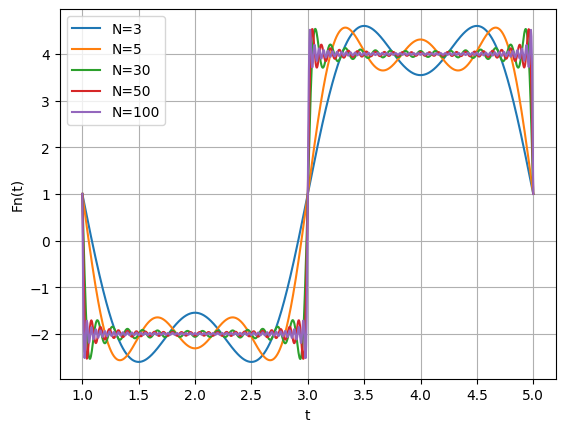

In [8]:
for n in [3, 5, 30, 50, 100]:
    plt.plot(t, Fn(square, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Fn(t)')
plt.legend()
plt.grid(True)

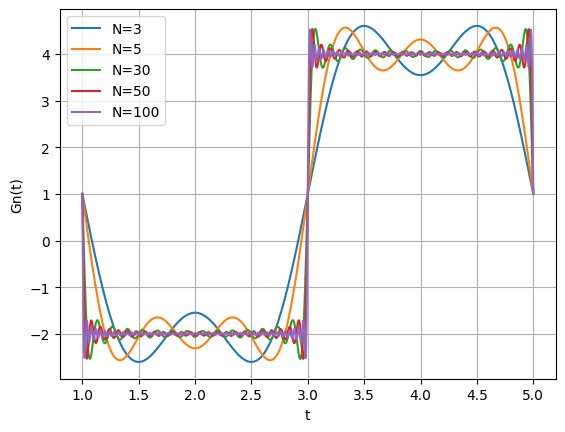

In [9]:
for n in [3, 5, 30, 50, 100]:
    plt.plot(t, Gn(square, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Gn(t)')
plt.legend()
plt.grid(True)

## Четная функция

\begin{equation}
    f(t) = \frac{1}{5}cos(\frac{10\pi}{T}t)
\end{equation}

In [10]:
def even(t):
    return 1 / 5 * np.cos(10 * np.pi / T * t)

### График исходной функции

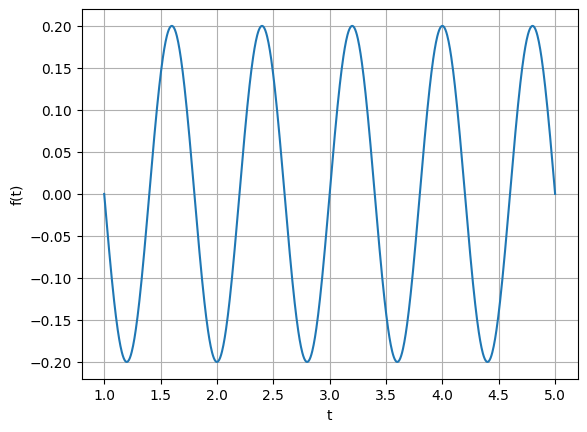

In [11]:
plt.plot(t, even(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)

### Коэффициенты Фурье

In [12]:
for n in range(4):
    w_n = 2 * np.pi * n / T
    a_n =  2 / T * np.trapz(even(t) * np.cos(w_n * t), t)
    b_n =  2 / T * np.trapz(even(t) * np.sin(w_n * t), t)
    c_n =  1 / T * np.trapz(even(t) * np.exp(-1j * w_n * t), t)
    display(Math(f'a_{n} = {np.round(a_n, 4)}, b_{n} = {np.round(b_n, 4)}, c_{n} = {np.round(c_n, 4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Графики частичных сумм

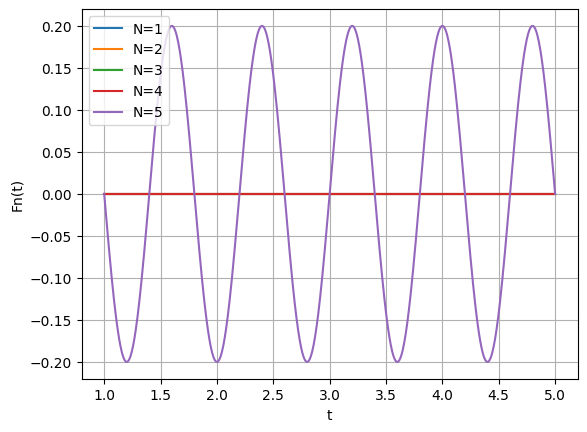

In [13]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Fn(even, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Fn(t)')
plt.legend()
plt.grid(True)

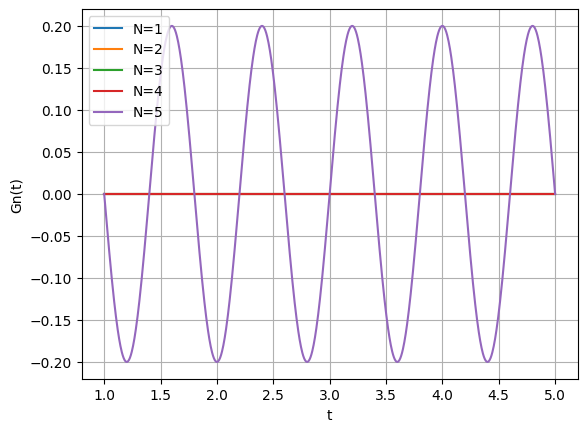

In [14]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Gn(even, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Gn(t)')
plt.legend()
plt.grid(True)

## Нечетная функция

\begin{equation}
    f(t) = 5sin(\frac{6\pi}{T}t)
\end{equation}

In [15]:
def odd(t):
    return 5 * np.sin(6 * np.pi / T * t)

### График исходной функции

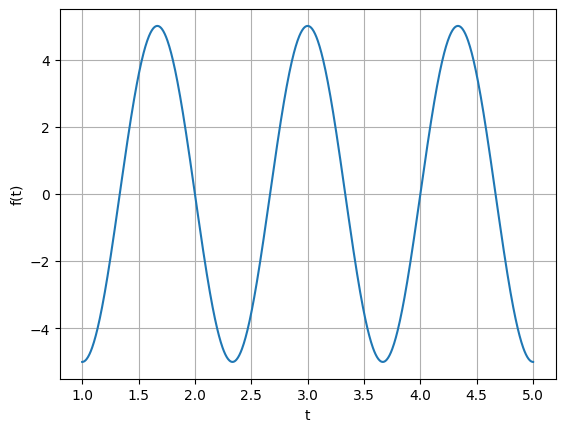

In [16]:
plt.plot(t, odd(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)

### Коэффициенты Фурье

In [17]:
for n in range(4):
    w_n = 2 * np.pi * n / T
    a_n =  2 / T * np.trapz(odd(t) * np.cos(w_n * t), t)
    b_n =  2 / T * np.trapz(odd(t) * np.sin(w_n * t), t)
    c_n =  1 / T * np.trapz(odd(t) * np.exp(-1j * w_n * t), t)
    display(Math(f'a_{n} = {np.round(a_n, 4)}, b_{n} = {np.round(b_n, 4)}, c_{n} = {np.round(c_n, 4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Графики частичных сумм

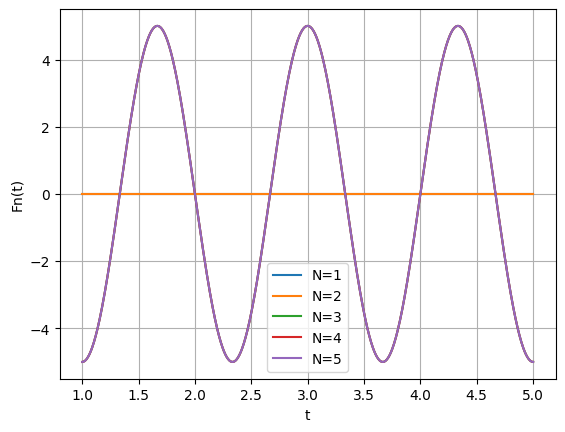

In [18]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Fn(odd, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Fn(t)')
plt.legend()
plt.grid(True)

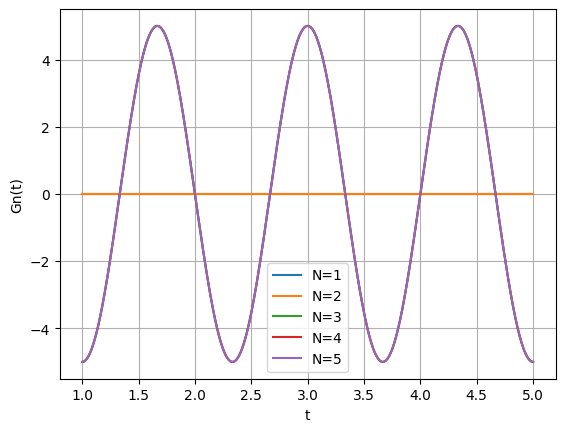

In [19]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Gn(odd, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Gn(t)')
plt.legend()
plt.grid(True)

## Ни четная, ни нечетная периодическая функция

\begin{equation}
f(t) = cos(\frac{10\pi}{T}t) + sin(\frac{\pi}{T}t)
\end{equation}

In [20]:
def strange(t):
    return np.cos(10 * np.pi / T * t) + np.sin(np.pi / T * t)

### График исходной функции

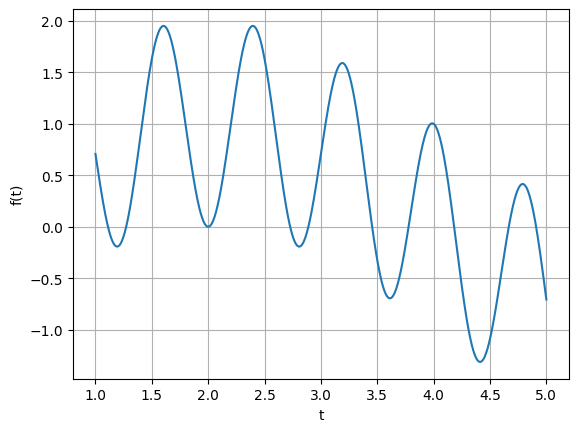

In [21]:
plt.plot(t, strange(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)

### Коэффициенты Фурье

In [22]:
for n in range(4):
    w_n = 2 * np.pi * n / T
    a_n =  2 / T * np.trapz(strange(t) * np.cos(w_n * t), t)
    b_n =  2 / T * np.trapz(strange(t) * np.sin(w_n * t), t)
    c_n =  1 / T * np.trapz(strange(t) * np.exp(-1j * w_n * t), t)
    display(Math(f'a_{n} = {np.round(a_n, 4)}, b_{n} = {np.round(b_n, 4)}, c_{n} = {np.round(c_n, 4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Графики частичных сумм

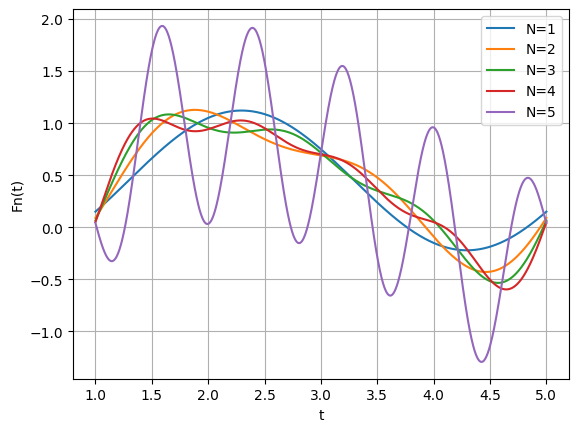

In [23]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Fn(strange, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Fn(t)')
plt.legend()
plt.grid(True)

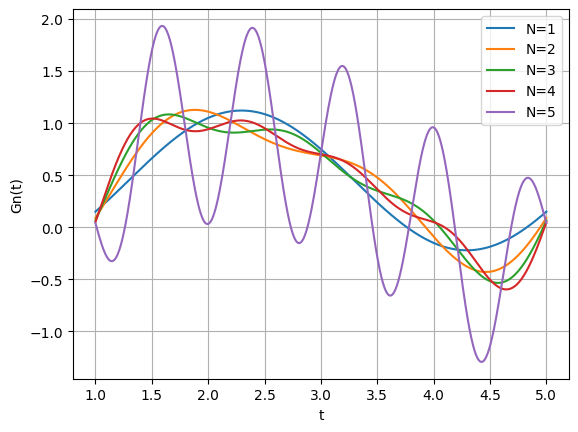

In [24]:
for n in [1, 2, 3, 4, 5]:
    plt.plot(t, Gn(strange, t, n), label=f'N={n}')
plt.xlabel('t')
plt.ylabel('Gn(t)')
plt.legend()
plt.grid(True)

### Равенство Парсеваля

\begin{equation}
||f||^2 = \hat a_0^2 + \sum_{n=1}^{\infty} (\hat a_n^2 + \hat b_n^2)
\end{equation}

In [26]:
X = [np.sqrt(1 / T) * np.trapz(strange(t), t)]
for n in range(1, 101):
    w_n = 2 * np.pi * n / T
    a_n =  np.sqrt(2 / T) * np.trapz(strange(t) * np.cos(w_n * t), t)
    b_n =  np.sqrt(2 / T) * np.trapz(strange(t) * np.sin(w_n * t), t)
    X.append(a_n)
    X.append(b_n)
display(Math(f'||f||^2 - (\hat a_0^2 + \sum_{{n=1}}^{{100}} (\hat a_n^2 + \hat b_n^2)) = {np.round(np.trapz(strange(t) * strange(t), t) - np.sum(np.power(np.abs(X), 2)), 4)}'))

<IPython.core.display.Math object>

\begin{equation}
||f||^2 = \sum_{n=-\infty}^{\infty} |\hat c_n|^2
\end{equation}

In [27]:
C = []
for n in range(-100, 101):
    w_n = 2 * np.pi * n / T
    c_n =  np.sqrt(1 / T) * np.trapz(strange(t) * np.exp(-1j * w_n * t), t)
    C.append(c_n)
display(Math(f'||f||^2 - \sum_{{n=-100}}^{{100}} |\hat c_n|^2 = {np.round(np.trapz(strange(t) * strange(t), t) - np.sum(np.power(np.abs(C), 2)), 4)}'))

<IPython.core.display.Math object>

# Задание 2. Комплексная функция

\begin{equation}
R, T > 0
\end{equation}

\begin{equation}
f: \mathbb{R} \to \mathbb{C}
\end{equation}

In [28]:
R, T = 4, 16

\begin{equation}
Re\ f(t) = 
    \begin{cases}
        R, &t \in [-\frac{T}{8},\frac{T}{8}),\\
        2R - 8Rt/T, &t \in [\frac{T}{8}, \frac{3T}{8}), \\
        -R, &t \in [\frac{3T}{8}, \frac{5T}{8}), \\
        -6R + 8Rt/T, &t \in [\frac{5T}{8}, \frac{7T}{8})
    \end{cases}
\end{equation}

\begin{equation}
Im\ f(t) = 
    \begin{cases}
        8Rt/T, &t \in [-\frac{T}{8},\frac{T}{8}),\\
        R, &t \in [\frac{T}{8}, \frac{3T}{8}), \\
        4R - 8Rt/T, &t \in [\frac{3T}{8}, \frac{5T}{8}), \\
        -R, &t \in [\frac{5T}{8}, \frac{7T}{8})
    \end{cases}
\end{equation}

In [29]:
def Re(t):
    return np.piecewise(t,
                         [((-T / 8 <= t) & (t < T / 8)), ((T / 8 <= t) & (t < 3 * T / 8)), ((3 * T / 8 <= t) & (t < 5 * T / 8)), ((5 * T / 8 <= t) & (t < 7 * T / 8))],
                         [R, lambda t: 2 * R - 8 * R * t / T, -R, lambda t: -6 * R + 8 * R * t / T])

In [30]:
def Im(t):
    return np.piecewise(t,
                         [((-T / 8 <= t) & (t < T / 8)), ((T / 8 <= t) & (t < 3 * T / 8)), ((3 * T / 8 <= t) & (t < 5 * T / 8)), ((5 * T / 8 <= t) & (t < 7 * T / 8))],
                         [lambda t: 8 * R * t / T, R, lambda t: 4 * R - 8 * R * t / T, R])

### График исходной на комплексной плоскости

Text(0, 0.5, 'Im f(t)')

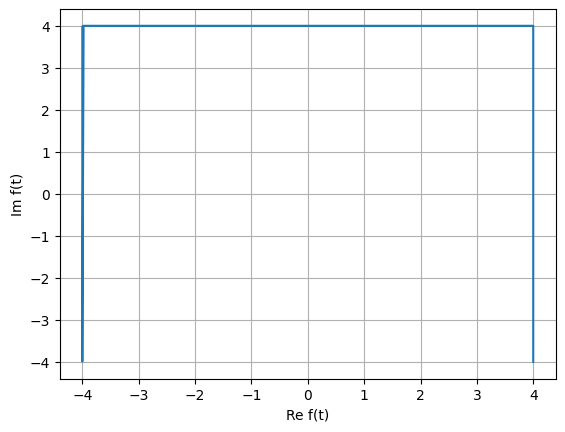

In [31]:
t = np.linspace(-T / 8, 7 * T / 8 - 0.001, 1000)
plt.plot(Re(t), Im(t))
plt.grid(True)
plt.xlabel('Re f(t)')
plt.ylabel('Im f(t)')

### Коэффициенты Фурье

In [32]:
for n in range(4):
    w_n = 2 * np.pi * n / T
    c_n =  1 / T * np.trapz(Re(t) * np.exp(-1j * w_n * t), t)
    display(Math(f'c_{n} = {np.round(c_n, 4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Графики частичных сумм

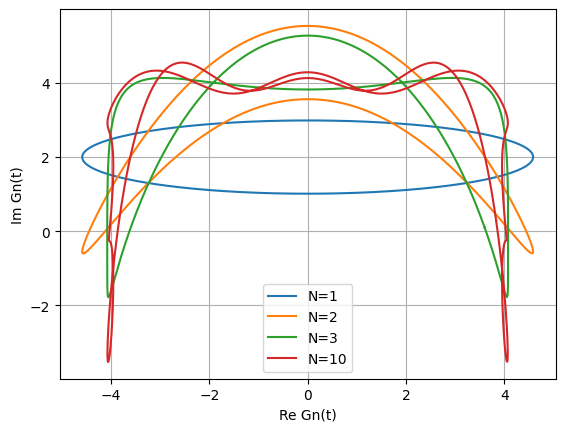

In [33]:
for n in [1, 2, 3, 10]:
    plt.plot(Gn(Re, t, n), Gn(Im, t, n), label = f'N={n}')
plt.grid(True)
plt.xlabel('Re Gn(t)')
plt.ylabel('Im Gn(t)')
plt.legend()

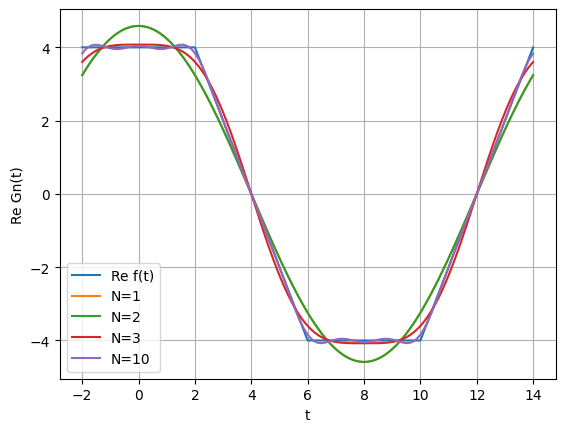

In [34]:
plt.plot(t, Re(t), label = 'Re f(t)')
for n in [1, 2, 3, 10]:
    plt.plot(t, Gn(Re, t, n), label = f'N={n}')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Re Gn(t)')
plt.legend()

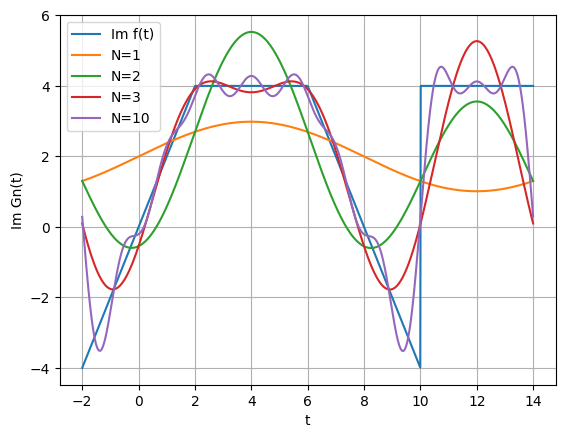

In [35]:
plt.plot(t, Im(t), label = 'Im f(t)')
for n in [1, 2, 3, 10]:
    plt.plot(t, Gn(Im, t, n), label = f'N={n}')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Im Gn(t)')
plt.legend()

### Равенство Парсеваля

\begin{equation}
||f||^2 = \sum_{n=-\infty}^{\infty} |\hat c_n|^2
\end{equation}

In [36]:
C = []
for n in range(-100, 101):
    w_n = 2 * np.pi * n / T
    c_n =  np.sqrt(1 / T) * np.trapz(Re(t) * np.exp(-1j * w_n * t), t)
    C.append(c_n)
display(Math(f'||Re f||^2 - \sum_{{n=-100}}^{{100}} |\hat c_n|^2 = {np.round(np.trapz(Re(t) * Re(t), t) - np.sum(np.power(np.abs(C), 2)), 4)}'))

<IPython.core.display.Math object>

In [37]:
C = []
for n in range(-700, 701):
    w_n = 2 * np.pi * n / T
    c_n =  np.sqrt(1 / T) * np.trapz(Im(t) * np.exp(-1j * w_n * t), t)
    C.append(c_n)
display(Math(f'||Im f||^2 - \sum_{{n=-700}}^{{700}} |\hat c_n|^2 = {np.round(np.trapz(Im(t) * Im(t), t) - np.sum(np.power(np.abs(C), 2)), 4)}'))

<IPython.core.display.Math object>